In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mcdonalds/mcdonalds.csv


# A.1 Step 1: Deciding (not) to Segment
McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy

# A.2 Step 2: Specifying the Ideal Target Segment
McDonald’s management needs to decide which key features make a market segment attractive to them. In terms of knock-out criteria, the target segment or target
segments must be homogeneous (meaning that segment members are similar to one
another in a key characteristic), distinct (meaning that members of the segments
differ substantially from members of other segments in a key characteristic), large
enough to justify the development and implementation of a customised marketing
mix, matching the strengths of McDonald’s (meaning, for example, that they must
be open to eating at fast food restaurants rather than rejecting them outright),
identifiable (meaning that there must be some way of spotting them among other
consumers) and, finally, reachable (meaning that channels of communication and
distribution need to exist which make it possible to aim at members of the target
segment specifically).
In terms of segment attractiveness criteria, the obvious choice would be a
segment that has a positive perception of McDonald’s, frequently eats out and likes
fast food. But McDonald’s management could also decide that they not only wish
to solidify their position in market segments in which they already hold high market
shares, but rather wish to learn more about market segments which are currently not
fond of McDonald’s; try to understand which perceptions are responsible for this;
and attempt to modify those very perceptions.
Given that the fast food data set in this case study contains very little information
beyond people’s brand image of McDonald’s, the following attractiveness criteria
will be used: liking McDonald’s and frequently eating at McDonald’s. These
segment attractiveness criteria represent key information in Step 8 where they
inform target segment selection.

# A.3 Step 3: Collecting Data
The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study conducted in preparation of the survey study. For each of those attributes, respondents
provided either a YES response (indicating that they feel McDonald’s possesses
this attribute), or a NO response (indicating that McDonald’s does not possess this
attribute).
In addition, respondents indicated their AGE and GENDER. Had this data been
collected for a real market segmentation study, additional information – such as
details about their dining out behaviour, and their use of information channels –
would have been collected to enable the development of a richer and more detailed
description of each market segment.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
df= pd.read_csv('/kaggle/input/mcdonalds/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
num_df=pd.get_dummies(df)
num_df.head()

,Age,yummy_No,yummy_Yes,convenient_No,convenient_Yes,spicy_No,spicy_Yes,fattening_No,fattening_Yes,greasy_No,...,Like_I hate it!-5,Like_I love it!+5,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Female,Gender_Male
0,61,1,0,0,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,51,0,1,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,62,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,69,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,49,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


# A.4 Step 4: Exploring Data
First we explore the key characteristics of the data set by loading the data set and
inspecting basic features such as the variable names, the sample size, and the first
three rows of the data:


In [6]:
spec_df=num_df.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,40,41]]
spec_df

,Age,yummy_Yes,convenient_Yes,spicy_Yes,fattening_Yes,greasy_Yes,fast_Yes,cheap_Yes,tasty_Yes,expensive_Yes,healthy_Yes,disgusting_Yes,Gender_Female,Gender_Male
0,61,0,1,0,1,0,1,1,0,1,0,0,1,0
1,51,1,1,0,1,1,1,1,1,1,0,0,1,0
2,62,0,1,1,1,1,1,0,1,1,1,0,1,0
3,69,1,1,0,1,1,1,1,1,0,0,1,1,0
4,49,0,1,0,1,1,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,47,0,1,0,1,1,0,0,0,1,0,1,0,1
1449,36,1,1,0,1,0,0,1,1,0,1,0,1,0
1450,52,1,1,0,1,0,1,0,1,1,0,0,1,0
1451,41,1,1,0,0,0,1,1,1,0,1,0,0,1


# A.5 Step 5: Extracting Segments
Step 5 is where we extract segments. To illustrate a range of extraction techniques,
we subdivide this step into three sections. In the first section, we will use standard
k-means analysis. In the second section, we will use finite mixtures of binary
distributions. In the third section, we will use finite mixtures of regressions.


In [7]:
def func(i):
  if str(i)=='Never':
    return 0
  elif str(i)=='Once a year':
    return 1
  elif str(i)=='Every three months':
    return 2
  elif str(i)=='Once a month':
    return 3
  elif str(i)=='Once a week':
    return 4
  elif str(i)=='More than once a week':
    return 5

In [8]:
list = ['yummy',	'convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap'	, 'tasty'	, 'expensive',	'healthy' ,	'disgusting']

for i in list:
  df[i] = df[i].apply(lambda x: 1 if x=="Yes" else 0)

df['Like'] = df['Like'].apply(lambda x:x[-1] if x=="I love it!+5" or "I hate it!-5" else int(x))

df['Like'] = df['Like'].apply(pd.to_numeric)

df['Gender'] = df['Gender'].apply(lambda x:  1 if x=="Male" else 0)

df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,2.757743,44.604955,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,1.645749,14.221178,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,57.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,1.000000


In [9]:
list1 = ['yummy',	'convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap'	, 'tasty'	, 'expensive',	'healthy' ,	'disgusting' , 'Gender']

df['VisitFrequency'] = df['VisitFrequency'].astype(str)
vfn = []

for i in df['VisitFrequency']:
  vfn.append(func(i))

df['VisitFrequencynum'] = vfn

x = df.loc[:,list1].values
x

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pf = pd.DataFrame(data = pc
             , columns = ['principal component 1', 'principal component 2'])

pf

,principal component 1,principal component 2
0,0.360699,-0.314246
1,-0.271777,0.288933
2,0.326076,0.610969
3,-0.239314,-0.439775
4,0.241102,-0.693957
...,...,...
1448,1.612038,0.310770
1449,-1.008625,-0.034596
1450,-0.225918,0.958570
1451,-1.098240,0.133613


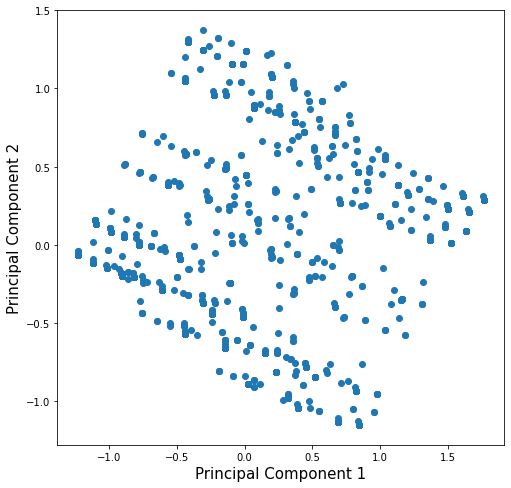

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(pf['principal component 1']
               , pf['principal component 2'])

# A.5.1 Using k-Means
We calculate solutions for two to eight market segments using standard k-means
analysis with ten random restarts (argument nrep). We then relabel segment
numbers such that they are consistent across segmentations.

Text(0, 0.5, 'WCSS')

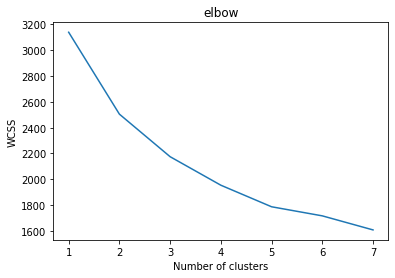

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [13]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [14]:
kmeansp = kmeans.predict(x)

labels = kmeans.labels_
print(labels[:100])

[0 3 3 1 0 1 3 1 2 3 0 3 0 3 2 1 1 3 2 3 3 3 3 3 1 3 1 0 0 1 1 1 1 0 1 0 1
 0 0 2 3 1 1 1 0 3 1 3 1 1 2 0 3 2 1 0 0 0 1 1 3 1 1 2 1 2 2 3 1 1 0 1 3 0
 1 2 1 2 3 1 2 0 0 1 2 1 3 3 3 3 1 1 2 0 1 3 0 0 2 1]


In [15]:
df['cluster_num'] = labels
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,3,61,Every three months,0,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0,2,3
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0,2,3
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0,4,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1,3,0


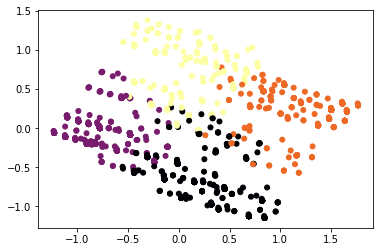

In [16]:
plt.scatter(pf['principal component 1'], pf['principal component 2'], c=kmeansp, s=25, cmap='inferno')

In [17]:
m2  = df.groupby(df['cluster_num'])
m2.mean()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,
0,0.018617,0.912234,0.087766,0.914894,0.587766,0.952128,0.885638,0.303191,0.013298,0.077128,0.324468,2.231383,49.404255,0.409574,1.704787
1,0.980583,0.980583,0.083495,0.788350,0.365049,0.961165,0.941748,0.980583,0.015534,0.351456,0.046602,3.050485,42.429126,0.372816,3.023301
2,0.020833,0.666667,0.075000,0.916667,0.712500,0.745833,0.070833,0.087500,0.908333,0.062500,0.716667,3.095833,47.575000,0.591667,1.441667
3,0.888199,0.965839,0.130435,0.900621,0.574534,0.857143,0.108696,0.919255,0.897516,0.198758,0.108696,2.652174,40.267081,0.549689,2.854037


In [18]:
m2.max()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,4
1,1,1,1,1,1,1,1,1,1,1,1,5,71,Once a year,1,5
2,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,5
3,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,5


In [19]:
m2.min()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0


0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
3        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

<Figure size 576x576 with 0 Axes>

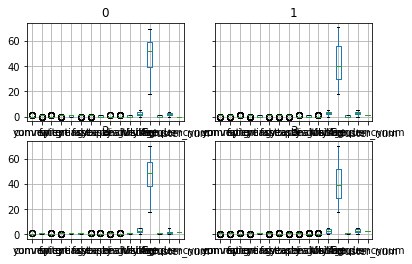

In [20]:
plt.figure(figsize=(8,8))
m2.boxplot()

# A.5.2 Using Mixtures of Distributions
We calculate latent class analysis using a finite mixture of binary distributions.
The mixture model maximises the likelihood to extract segments (as opposed to
minimising squared Euclidean distance, as is the case for k-means). The call to
stepFlexmix() extracts two to eight segments (k = 2:8) using ten random
restarts of the EM algorithm (nrep), model = FLXMCmvbinary() for a
segment-specific model consisting of independent binary distributions and no
intermediate output about progress (verbose = FALSE).

cluster_num
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

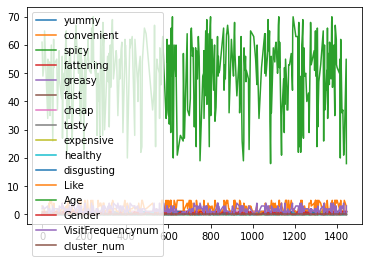

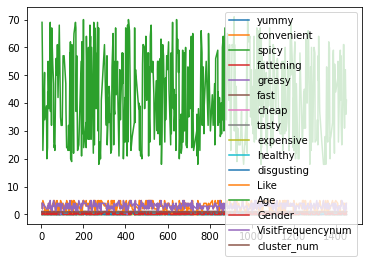

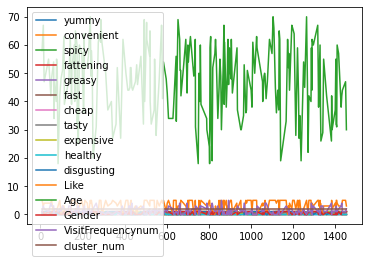

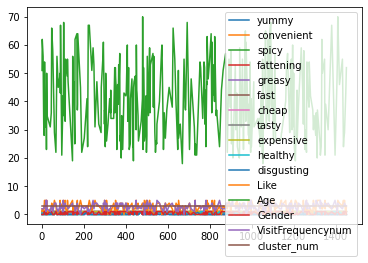

In [21]:
m2.plot()

# A.6 Step 6: Profiling Segments
The core of the segmentation analysis is complete: market segments have been
extracted. Now we need to understand what the four-segment k-means solution
means. The first step in this direction is to create a segment profile plot. The segment
profile plot makes it easy to see key characteristics of each market segment. It also
highlights differences between segments. To ensure the plot is easy to interpret,
similar attributes should be positioned close to one another. We achieve this by
calculating a hierarchical cluster analysis. Hierarchical cluster analysis used on
attributes (rather than consumers) identifies – attribute by attribute – the most
similar ones.

cluster_num
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
2    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
3    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

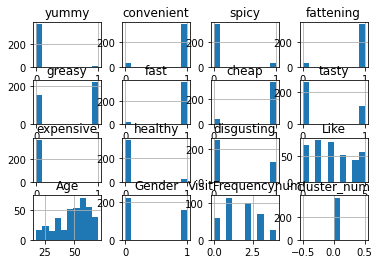

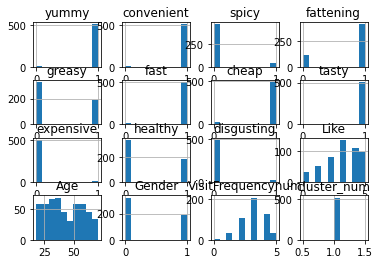

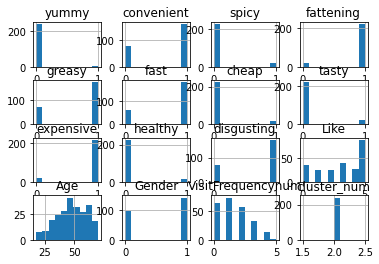

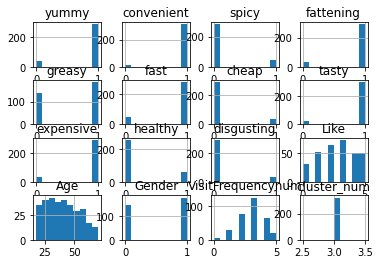

In [22]:
m2.hist()

# A.7 Step 7: Describing Segments
The fast food data set is not typical for data collected for market segmentation
analysis because it contains very few descriptor variables. Descriptor variables
– additional pieces of information about consumers – are critically important to
gaining a good understanding of market segments. One descriptor variable available
in the fast food data set is the extent to which consumers love or hate McDonald’s.
Using a simple mosaic plot, we can visualise the association between segment
membership and loving or hating McDonald’s.

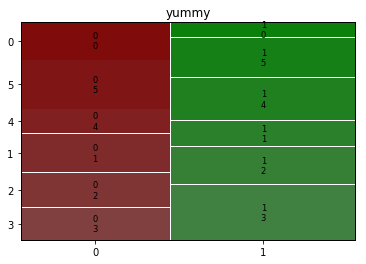

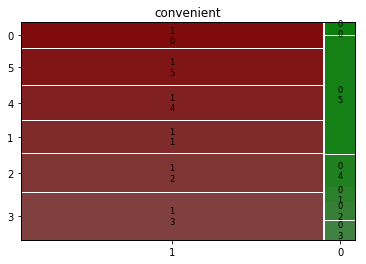

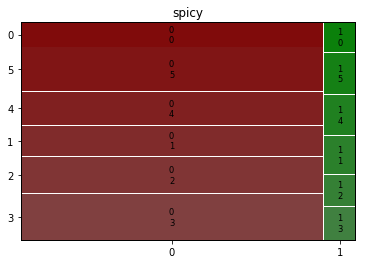

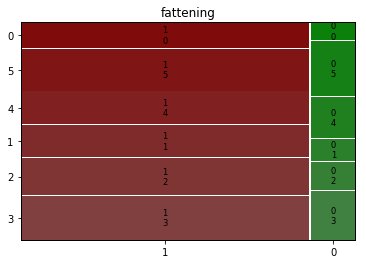

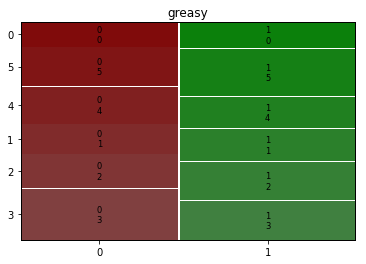

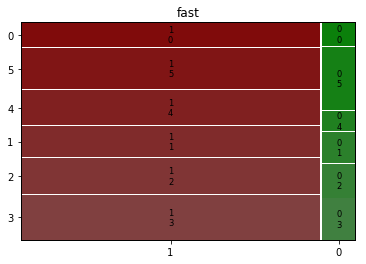

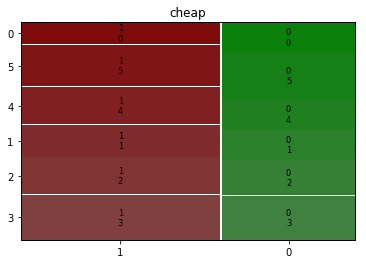

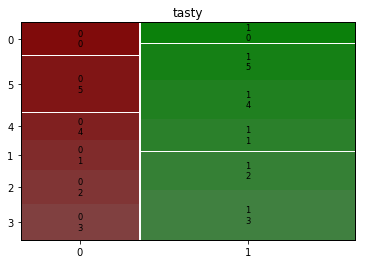

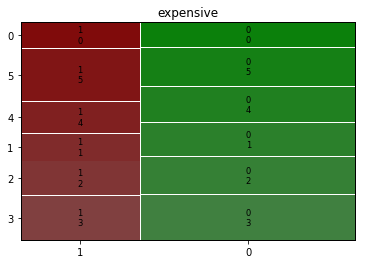

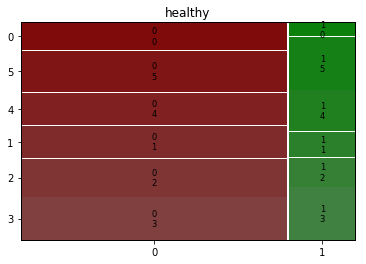

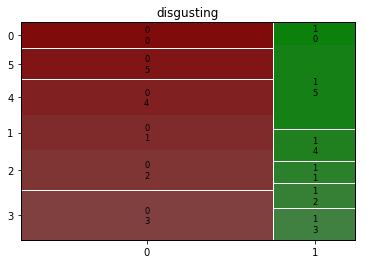

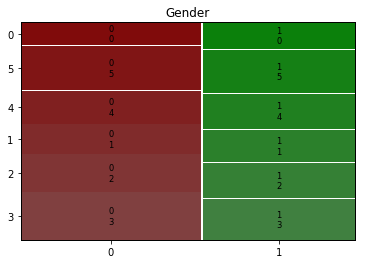

In [23]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product


for i in list1:
  mosaic(df,[i , 'Like'],title = i)
  plt.show()

In [24]:
m2.Like.mean()

cluster_num
0    2.231383
1    3.050485
2    3.095833
3    2.652174
Name: Like, dtype: float64

In [25]:
m2.VisitFrequencynum.mean()

cluster_num
0    1.704787
1    3.023301
2    1.441667
3    2.854037
Name: VisitFrequencynum, dtype: float64

# A.8 Step 8: Selecting (the) Target Segment(s)
Using the knock-out criteria and segment attractiveness criteria specified in Step 2,
users of the market segmentation (McDonald’s managers) can now proceed to
develop a segment evaluation plot.


# A.9 Step 9: Customising the Marketing Mix
In Step 9 the marketing mix is designed. If, for example, McDonald’s managers
decide to focus on segment 3 (young customers who like McDonald’s, think the
food is yummy and tasty, but perceive it as pretty expensive), they could choose to
offer a MCSUPERBUDGET line to cater specifically to the price expectations of this
segment (4Ps: Price). The advantage of such an approach might be that members
of segment 3 develop to become loyal customers who, as they start earning more
money, will not care about the price any more and move to the regular McDonald’s
range of products. To not cannibalise the main range, the product features of the
MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next,
communication channels would have to be identified which are heavily used by
members of segment 3 to communicate the availability of the MCSUPERBUDGET
line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same
given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s
management could consider having a MCSUPERBUDGET lane where the wait in the
queue might be slightly longer in an attempt not to cannibalise the main product line.




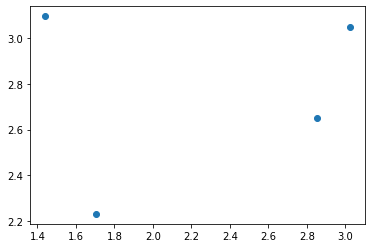

In [26]:
plt.scatter(m2.VisitFrequencynum.mean(),m2.Like.mean())

In [27]:
dff = df.loc[df['cluster_num']==2]
dff

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum,cluster_num
8,0,0,0,1,1,0,0,0,1,0,1,5,58,Once a year,1,1,2
14,0,1,0,1,0,1,0,0,1,0,0,3,67,Once a month,1,3,2
18,0,0,0,1,1,1,1,0,1,0,1,4,47,Every three months,0,2,2
39,0,0,0,1,1,1,0,0,1,0,1,4,55,Once a year,1,1,2
50,0,1,1,1,1,1,0,0,1,0,1,4,42,Once a week,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,0,1,0,1,0,1,0,0,1,1,0,3,38,Once a month,0,3,2
1430,0,1,0,1,1,1,1,0,1,0,1,3,42,Once a week,1,4,2
1433,0,0,0,0,0,0,0,0,1,0,1,5,44,Once a year,1,1,2
1448,0,1,0,1,1,0,0,0,1,0,1,5,47,Once a year,1,1,2


In [28]:
dff.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,VisitFrequencynum,cluster_num
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0
mean,0.020833,0.666667,0.075000,0.916667,0.712500,0.745833,0.070833,0.087500,0.908333,0.062500,0.716667,3.095833,47.575000,0.591667,1.441667,2.0
std,0.143125,0.472390,0.263942,0.276963,0.453543,0.436302,0.257082,0.283157,0.289158,0.242567,0.451559,1.848663,12.462605,0.492553,1.215629,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.750000,38.750000,0.000000,0.000000,2.0
50%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,48.500000,1.000000,1.000000,2.0
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,58.000000,1.000000,2.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,70.000000,1.000000,5.000000,2.0


<AxesSubplot:>

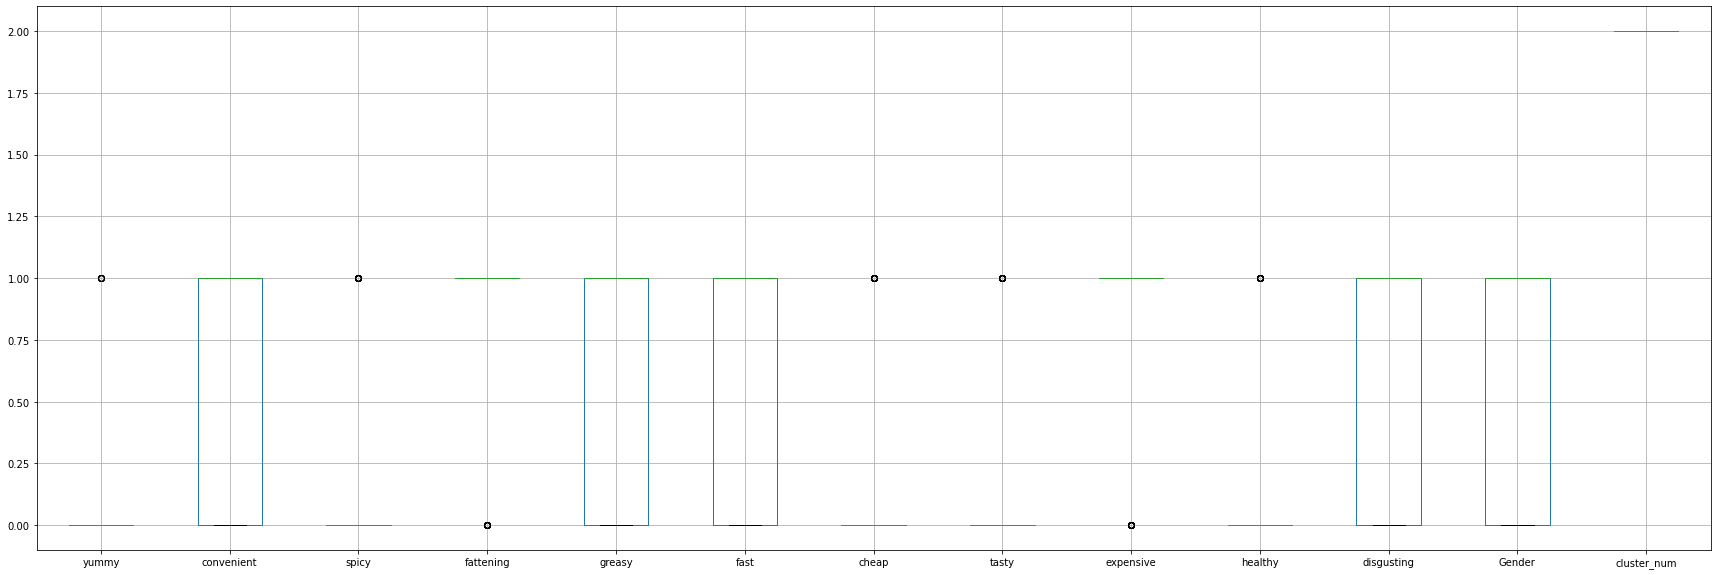

In [29]:
dff2 = dff.drop(['Age','Like','VisitFrequencynum'], axis = 1)
plt.figure(figsize = (30,10))
dff2.boxplot()

array([[<AxesSubplot:title={'center':'yummy'}>,
        <AxesSubplot:title={'center':'convenient'}>,
        <AxesSubplot:title={'center':'spicy'}>,
        <AxesSubplot:title={'center':'fattening'}>],
       [<AxesSubplot:title={'center':'greasy'}>,
        <AxesSubplot:title={'center':'fast'}>,
        <AxesSubplot:title={'center':'cheap'}>,
        <AxesSubplot:title={'center':'tasty'}>],
       [<AxesSubplot:title={'center':'expensive'}>,
        <AxesSubplot:title={'center':'healthy'}>,
        <AxesSubplot:title={'center':'disgusting'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'cluster_num'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

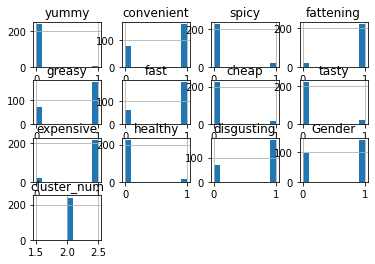

In [30]:
dff2.hist()

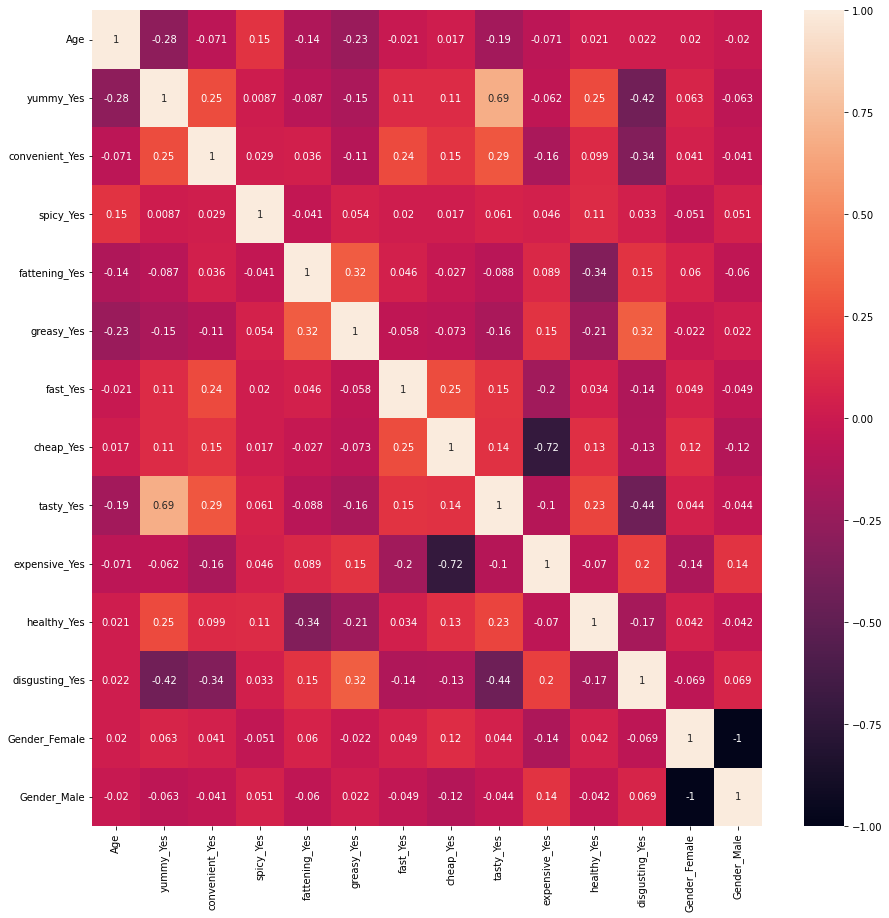

In [31]:
spec_df.corr()
#Correlation Matrix

plt.figure(figsize=(15,15))
sns.heatmap(spec_df.corr(), annot=True)
plt.show()

# A.10 Step 10: Evaluation and Monitoring
After the market segmentation analysis is completed, and all strategic and tactical
marketing activities have been undertaken, the success of the market segmentation
strategy has to be evaluated, and the market must be carefully monitored on a
continuous basis. It is possible, for example, that members of segment 3 start earning
more money and the MCSUPERBUDGET line is no longer suitable for them. Changes
can occur within existing market segments. But changes can also occur in the
larger marketplace, for example, if new competitors enter the market. All potential
sources of change have to be monitored in order to detect changes which require
McDonald’s management to adjust their strategic or tactical marketing in view of
new market circumstances.